In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical stock data of Coca-Cola and Pepsi from 2020-10-01 to 2025-10-01 from yfinance 
TICKERS = ("KO", "PEP")
START = "2020-10-01"
END = "2025-10-01"

KO_data = yf.download("KO", start="2020-10-01", end="2025-10-01")
PEP_data = yf.download("PEP", start="2020-10-01", end="2025-10-01")

C:\Users\xiong\AppData\Local\Temp\ipykernel_16184\800682560.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  KO_data = yf.download("KO", start="2020-10-01", end="2025-10-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\xiong\AppData\Local\Temp\ipykernel_16184\800682560.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  PEP_data = yf.download("PEP", start="2020-10-01", end="2025-10-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Sort dataframes
KO_data = KO_data.sort_index()
PEP_data = PEP_data.sort_index()

# use new series to store (Closing price on day n) / (Closing price on day 1) as a percentage
KO_norm = KO_data["Close"] / KO_data["Close"].dropna().iloc[0]*100
PEP_norm = PEP_data["Close"] / PEP_data["Close"].dropna().iloc[0]*100

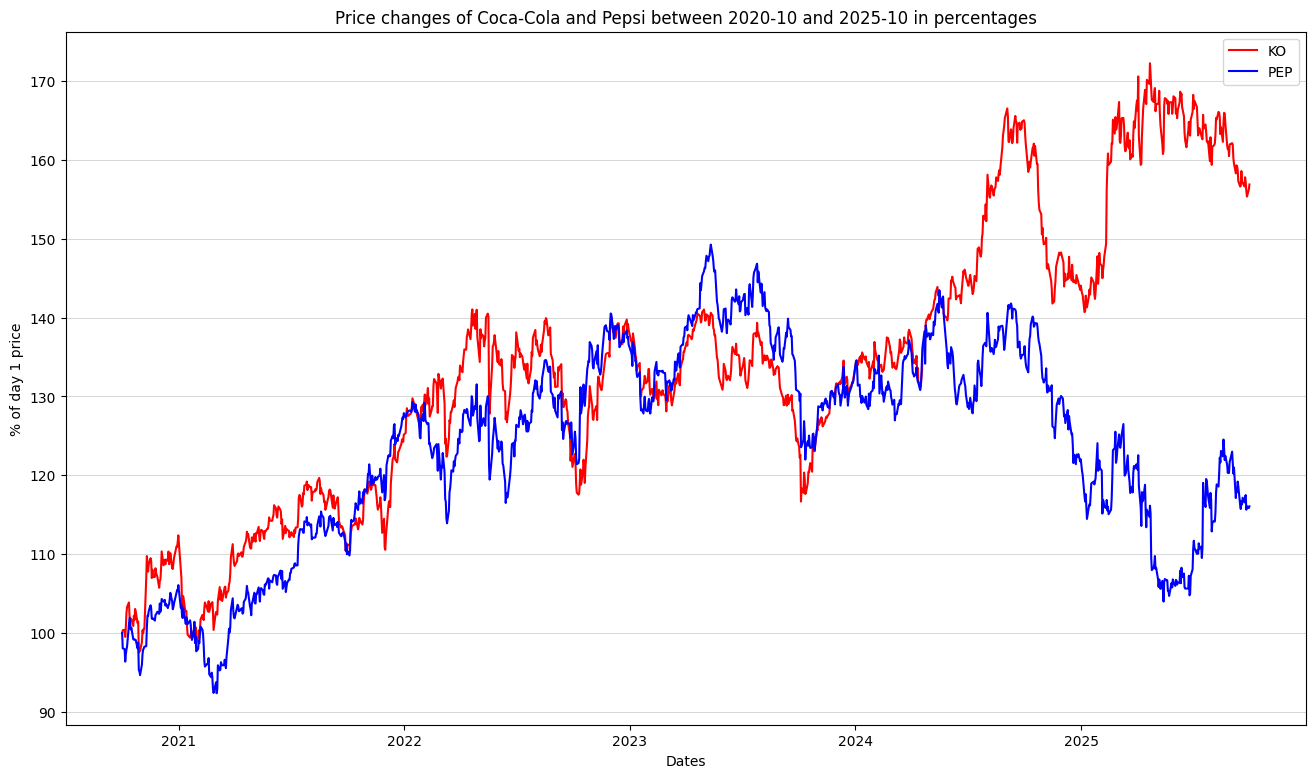

In [34]:
# Set the dimensions of the plot
plt.figure(figsize=(16,9))
# Add the stocks to the plot
plt.plot(KO_data.index, KO_norm, label = "KO", color = "red")
plt.plot(PEP_data.index, PEP_norm, label = "PEP", color = "blue")
# Add a line indicating initial price
# plt.axhline(y = 100, color = "gray", linestyle = "--", linewidth = "0.5")
plt.grid(axis='y', linestyle='-', linewidth = "0.5", alpha=0.7)

# Add a legend and title to describe plot, etc.
plt.legend()
plt.title("Price changes of Coca-Cola and Pepsi between 2020-10 and 2025-10 in percentages")
plt.xlabel("Dates")
plt.ylabel("% of day 1 price")
plt.show()

TypeError: _AxesBase.set_ylim() got an unexpected keyword argument 'autoscale'

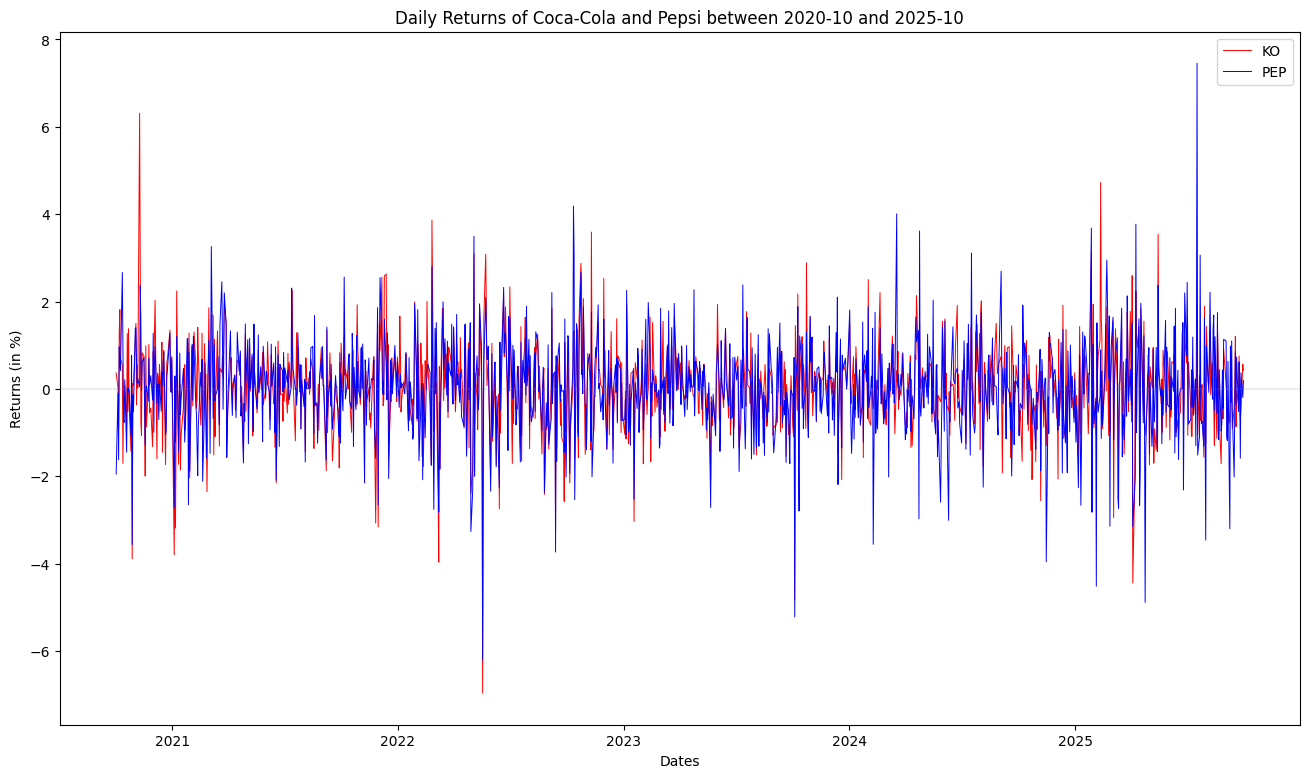

In [ ]:
KO_return = KO_data["Close"].pct_change().dropna()*100
PEP_return = PEP_data["Close"].pct_change().dropna()*100

plt.figure(figsize=(16,9))
plt.plot(KO_return.index, KO_return, label = "KO", color = "red", linewidth = "0.7")
plt.plot(PEP_return.index, PEP_return, label = "PEP", color = "blue", linewidth = "0.7")
plt.axhline(y = 0, color = "gray", linestyle = "--", linewidth = "0.3")
plt.legend()
plt.title("Daily Returns of Coca-Cola and Pepsi between 2020-10 and 2025-10")
plt.xlabel("Dates")
plt.ylabel("Returns (in %)")
plt.autoscale()
plt.show()